In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### We have 3 datasets so lets import them and have a look on them

In [2]:
movies = pd.read_csv('/kaggle/input/movielens/movies.dat', sep='::', encoding='ISO-8859-1',engine='python')
ratings = pd.read_csv('/kaggle/input/movielens/ratings.dat', sep='::', encoding='ISO-8859-1',engine='python')
users= pd.read_csv('/kaggle/input/movielens/users.dat', sep='::', encoding='ISO-8859-1',engine='python')
# If you dont specify the engine then you will have warnings

## Pipeline will consist of following 4 steps
### 1. Data Cleaning and Intution
### 2. EDA
### 3. Modelling
### 4. Model Evaluation

## 1. Data Cleaning and Intution

In [3]:
movies.head()

,1,Toy Story (1995),Animation|Children's|Comedy
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller


In [4]:
ratings.head()

,1,1193,5,978300760
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268


### As we see the column names are missing so lets give them names

In [5]:
movies.columns =['movie_id','movie_name','category']
ratings.columns =['user_id','movie_id','ratings','time_stamp']
users.columns =['user_id','gender','age','occupation','zip_code']

In [6]:
movies.head()

,movie_id,movie_name,category
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller


In [7]:
movies.shape

(3882, 3)

### We have increased the no of features which is not a good idea most of the time but lets see where it goes

In [8]:
'''
Now we dont need category column so we will remove it after merging all the dataset
'''
ratings.head()

,user_id,movie_id,ratings,time_stamp
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268


In [9]:
ratings['ratings'].unique()

array([3, 4, 5, 2, 1])

In [10]:
'''
We dont need time_stamp
'''
ratings.drop(['time_stamp'],inplace=True,axis=1)

In [11]:
ratings.head()

,user_id,movie_id,ratings
0,1,661,3
1,1,914,3
2,1,3408,4
3,1,2355,5
4,1,1197,3


In [12]:
users.head()

,user_id,gender,age,occupation,zip_code
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117


In [13]:
'''
We dont need any zipcode
'''
users.drop(['zip_code'],axis=1,inplace=True)

In [14]:
movie_ratings=movies.merge(ratings ,on='movie_id')

In [15]:
movie_ratings.head()

,movie_id,movie_name,category,user_id,ratings
0,2,Jumanji (1995),Adventure|Children's|Fantasy,10,5
1,2,Jumanji (1995),Adventure|Children's|Fantasy,13,3
2,2,Jumanji (1995),Adventure|Children's|Fantasy,18,2
3,2,Jumanji (1995),Adventure|Children's|Fantasy,23,2
4,2,Jumanji (1995),Adventure|Children's|Fantasy,27,1


In [16]:
# mru short for movie-rating-users
mru=movie_ratings.merge(users,on='user_id')

In [17]:

from sklearn.preprocessing import MultiLabelBinarizer

# Extract categories and split them
categories_split = [category.split('|') for category in mru['category']]

# Initialize and fit the MultiLabelBinarizer
mlb = MultiLabelBinarizer()
one_hot_encoded = mlb.fit_transform(categories_split)

# Convert the one-hot encoded matrix to a DataFrame for better visualization
one_hot_df = pd.DataFrame(one_hot_encoded, columns=mlb.classes_)

# Concatenate the original DataFrame with the one-hot encoded DataFrame
result_df = pd.concat([mru, one_hot_df], axis=1)

print(result_df)

        movie_id                  movie_name  \
0              2              Jumanji (1995)   
1              7              Sabrina (1995)   
2             24               Powder (1995)   
3             32       Twelve Monkeys (1995)   
4             48           Pocahontas (1995)   
...          ...                         ...   
998075      3513  Rules of Engagement (2000)   
998076      3535      American Psycho (2000)   
998077      3536    Keeping the Faith (2000)   
998078      3555                U-571 (2000)   
998079      3578            Gladiator (2000)   

                                    category  user_id  ratings gender  age  \
0               Adventure|Children's|Fantasy       10        5      F   35   
1                             Comedy|Romance       10        4      F   35   
2                               Drama|Sci-Fi       10        3      F   35   
3                               Drama|Sci-Fi       10        5      F   35   
4       Animation|Children's|Musi

In [18]:
mru=result_df.copy()

In [19]:
mru.head()

,movie_id,movie_name,category,user_id,ratings,gender,age,occupation,Action,Adventure,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,2,Jumanji (1995),Adventure|Children's|Fantasy,10,5,F,35,1,0,1,...,1,0,0,0,0,0,0,0,0,0
1,7,Sabrina (1995),Comedy|Romance,10,4,F,35,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,24,Powder (1995),Drama|Sci-Fi,10,3,F,35,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,32,Twelve Monkeys (1995),Drama|Sci-Fi,10,5,F,35,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,48,Pocahontas (1995),Animation|Children's|Musical|Romance,10,4,F,35,1,0,0,...,0,0,0,1,0,1,0,0,0,0


In [20]:
mru.dtypes

movie_id        int64
movie_name     object
category       object
user_id         int64
ratings         int64
gender         object
age             int64
occupation      int64
Action          int64
Adventure       int64
Animation       int64
Children's      int64
Comedy          int64
Crime           int64
Documentary     int64
Drama           int64
Fantasy         int64
Film-Noir       int64
Horror          int64
Musical         int64
Mystery         int64
Romance         int64
Sci-Fi          int64
Thriller        int64
War             int64
Western         int64
dtype: object

In [21]:

'''
Above is the list of data types of columns I included all those which I will use
, as we have movie id so i am dropping the movie_name column and category
'''
# Converting Gender col into numeric form
print(mru['gender'].unique())
mru['gender'].replace({'M':0,'F':1},inplace=True)

['F' 'M']


In [22]:
mru.isnull().sum()

movie_id       0
movie_name     0
category       0
user_id        0
ratings        0
gender         0
age            0
occupation     0
Action         0
Adventure      0
Animation      0
Children's     0
Comedy         0
Crime          0
Documentary    0
Drama          0
Fantasy        0
Film-Noir      0
Horror         0
Musical        0
Mystery        0
Romance        0
Sci-Fi         0
Thriller       0
War            0
Western        0
dtype: int64

In [23]:
mru.duplicated().sum()

0

## 2. EDA

### No of people by age

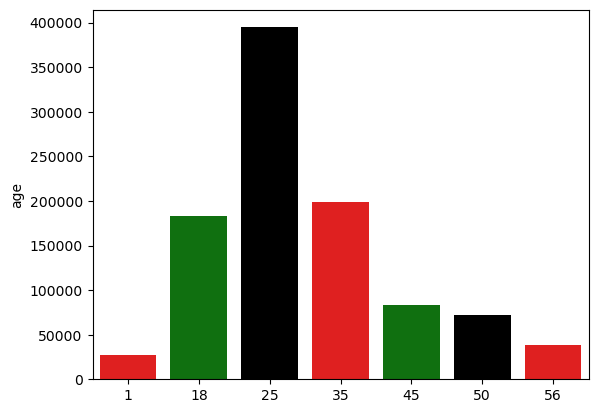

In [24]:
sns.barplot(x=mru['age'].value_counts().index, y=mru['age'].value_counts(), palette=['red', 'green', 'black'])
plt.show()

### No of Ratings

<Axes: ylabel='ratings'>

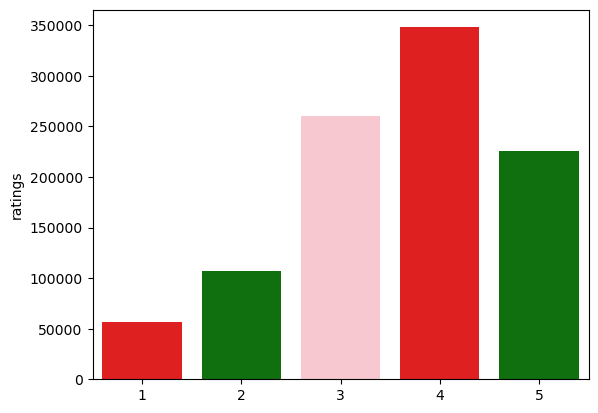

In [25]:
sns.barplot(x=mru['ratings'].value_counts().index, y=mru['ratings'].value_counts(), palette=['red', 'green', 'pink'])

In [26]:
mru.groupby('age').size()

age
1      27047
18    183088
25    394766
35    198580
45     83490
50     72382
56     38727
dtype: int64

In [27]:
most_rated_movies=mru.groupby('movie_name').size().sort_values(ascending=False)[:20]

<Axes: xlabel='movie_name'>

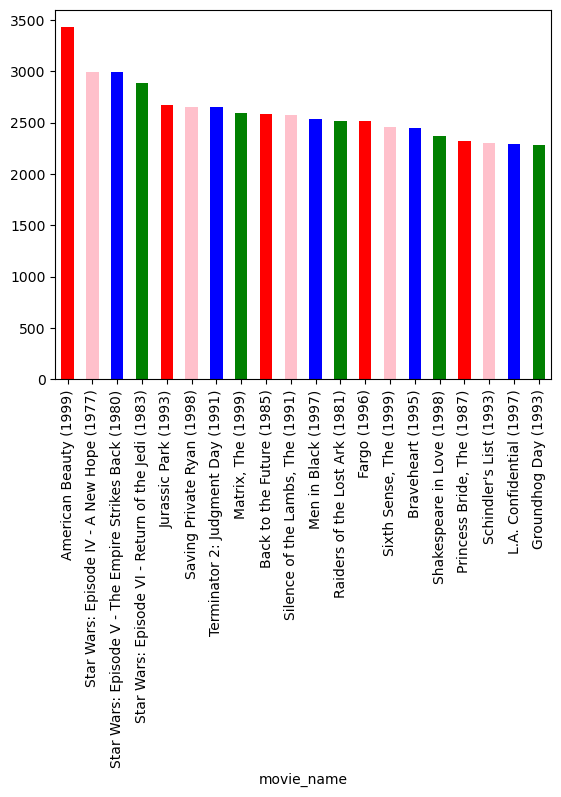

In [28]:
most_rated_movies.plot(kind='bar',color=['red','pink','blue','green'])

## Gender Analysis

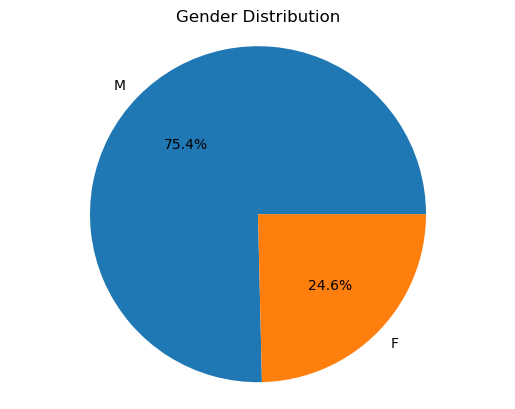

In [29]:
plt.pie(mru['gender'].value_counts(), labels=['M', 'F'], autopct="%.1f%%")
plt.title('Gender Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

## 3. Data Modelling

In [30]:
mru.head()

,movie_id,movie_name,category,user_id,ratings,gender,age,occupation,Action,Adventure,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,2,Jumanji (1995),Adventure|Children's|Fantasy,10,5,1,35,1,0,1,...,1,0,0,0,0,0,0,0,0,0
1,7,Sabrina (1995),Comedy|Romance,10,4,1,35,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,24,Powder (1995),Drama|Sci-Fi,10,3,1,35,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,32,Twelve Monkeys (1995),Drama|Sci-Fi,10,5,1,35,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,48,Pocahontas (1995),Animation|Children's|Musical|Romance,10,4,1,35,1,0,0,...,0,0,0,1,0,1,0,0,0,0


In [31]:
# We dont need movie name and category column so we can drop it
mru.drop(['movie_name','category','user_id'],axis=1,inplace=True)

In [32]:
mru.head()

,movie_id,ratings,gender,age,occupation,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,2,5,1,35,1,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1,7,4,1,35,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,24,3,1,35,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,32,5,1,35,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,48,4,1,35,1,0,0,1,1,0,...,0,0,0,1,0,1,0,0,0,0


In [33]:
mru.dropna(inplace=True)

### Splitting the training and testing dataset

In [34]:
x=mru.drop(['ratings'],axis=1).values
y=mru['ratings'].values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x[:60000],y[:60000],random_state=42,train_size=0.8)

In [35]:
x_train

array([[2006,    0,   18, ...,    0,    0,    0],
       [ 596,    0,   25, ...,    0,    0,    0],
       [1754,    0,   18, ...,    1,    0,    0],
       ...,
       [ 592,    0,   35, ...,    0,    0,    0],
       [3390,    0,   35, ...,    0,    0,    0],
       [1263,    0,   18, ...,    0,    1,    0]])

### Importing and Instantiating the Regression Models

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier

In [38]:

knc = KNeighborsClassifier()
lr = LogisticRegression(solver='sag')
dtc = DecisionTreeClassifier(max_depth=5)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

In [39]:
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix


In [40]:
svc=SVC()
svc.fit(x_train,y_train)

SVC()

In [41]:
accuracy_score(y_test,svc.predict(x_test))

0.3289166666666667

In [42]:
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50, random_state=2)

In [43]:
ypred=rfc.predict(x_test)

In [44]:
accuracy_score(y_test,ypred)

0.3288333333333333

In [45]:
knc.fit(x_train,y_train)

KNeighborsClassifier()

In [46]:
accuracy_score(y_test,knc.predict(x_test))

0.3099166666666667

In [48]:
etc=ExtraTreesClassifier()

In [49]:
etc.fit(x_train,y_train)

ExtraTreesClassifier()

In [50]:
accuracy_score(y_test,etc.predict(x_test))

0.3175